# House Prices Advanced Regression Techniques

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. This dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

The competition challenges you to predict the final price of each home.

For each Id in the test set, you must predict the value of the SalePrice variable.

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Data Exploration

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Handle Missing Data

We will check for null or error data.

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Our most important column is SalePrice. No null value, no negative value.

Skewness: 1.882876
Kurtosis: 6.536282


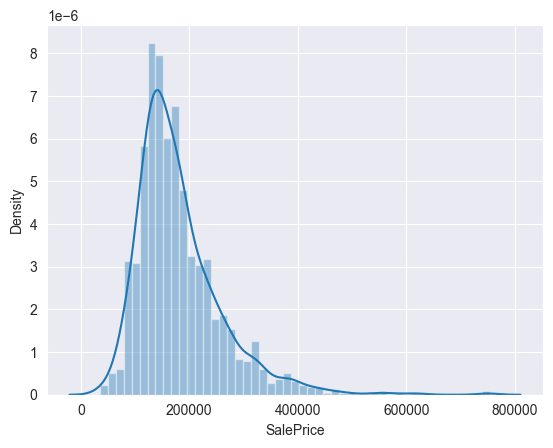

In [6]:
sns.distplot(df_train['SalePrice'])

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

The distribution of SalePrice is not normal. It is right skewed. We will transform it later.

In [7]:
df_null = df_train.isnull().sum().sort_values(ascending=False)
df_null_percent = (df_train.isnull().sum()/df_train.isnull().count() * 100).sort_values(ascending=False)

df_missing = pd.concat([df_null, df_null_percent], axis=1, keys=['Total', 'Percent'])
df_missing.head(20)

Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
GarageType       81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtFinType2     38   2.602740
BsmtExposure     38   2.602740
BsmtQual         37   2.534247
BsmtCond         37   2.534247
BsmtFinType1     37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
Electrical        1   0.068493
Id                0   0.000000

We will not do any fancy things. Use median to fill numeric columns and mode to fill categorical columns.

In [8]:
discrete_columns = [c for c in df_train.columns if df_train[c].dtype == 'object']
continuous_columns = [c for c in df_train.columns if df_train[c].dtype != 'object']

for c in discrete_columns:
    df_train[c] = df_train[c].fillna(df_train[c].value_counts().idxmax())

for c in continuous_columns:
    df_train[c] = df_train[c].fillna(df_train[c].median())

df_train_no_missing = df_train.dropna()
df_train_no_missing.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

Check the stat of the filled data.

In [9]:
df_train_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
print(f'Total missing values: {df_train_no_missing.isnull().sum().sum()}')

Total missing values: 0


## Data Visualization

In [11]:
continuous_columns = [c for c in df_train_no_missing.columns if df_train_no_missing[c].dtype != 'object']
continuous_columns.remove('Id')

discrete_columns = [c for c in df_train_no_missing.columns if df_train_no_missing[c].dtype == 'object']

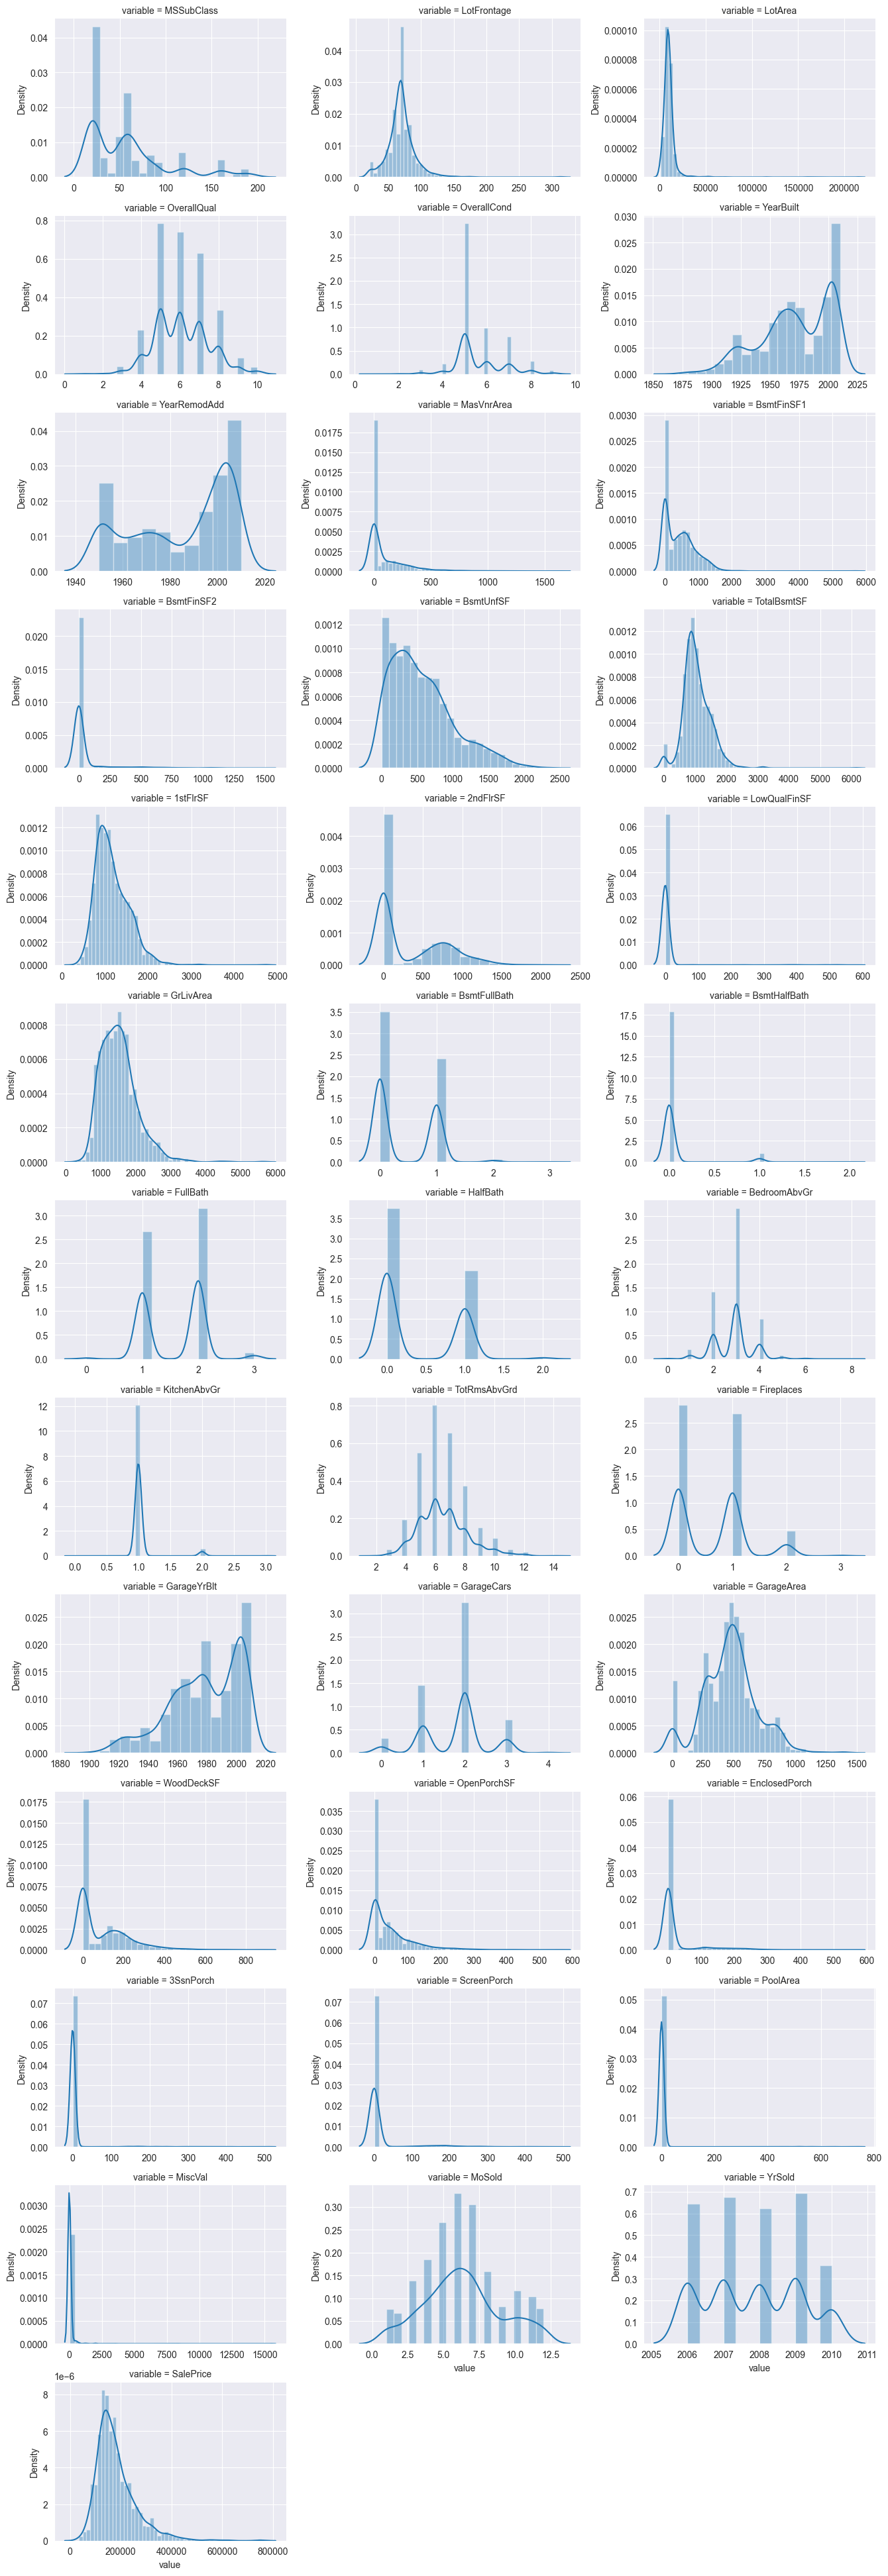

In [12]:
df_continuous_melted = pd.melt(df_train_no_missing, value_vars=continuous_columns)
g = sns.FacetGrid(df_continuous_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)
g.map(sns.distplot, "value")

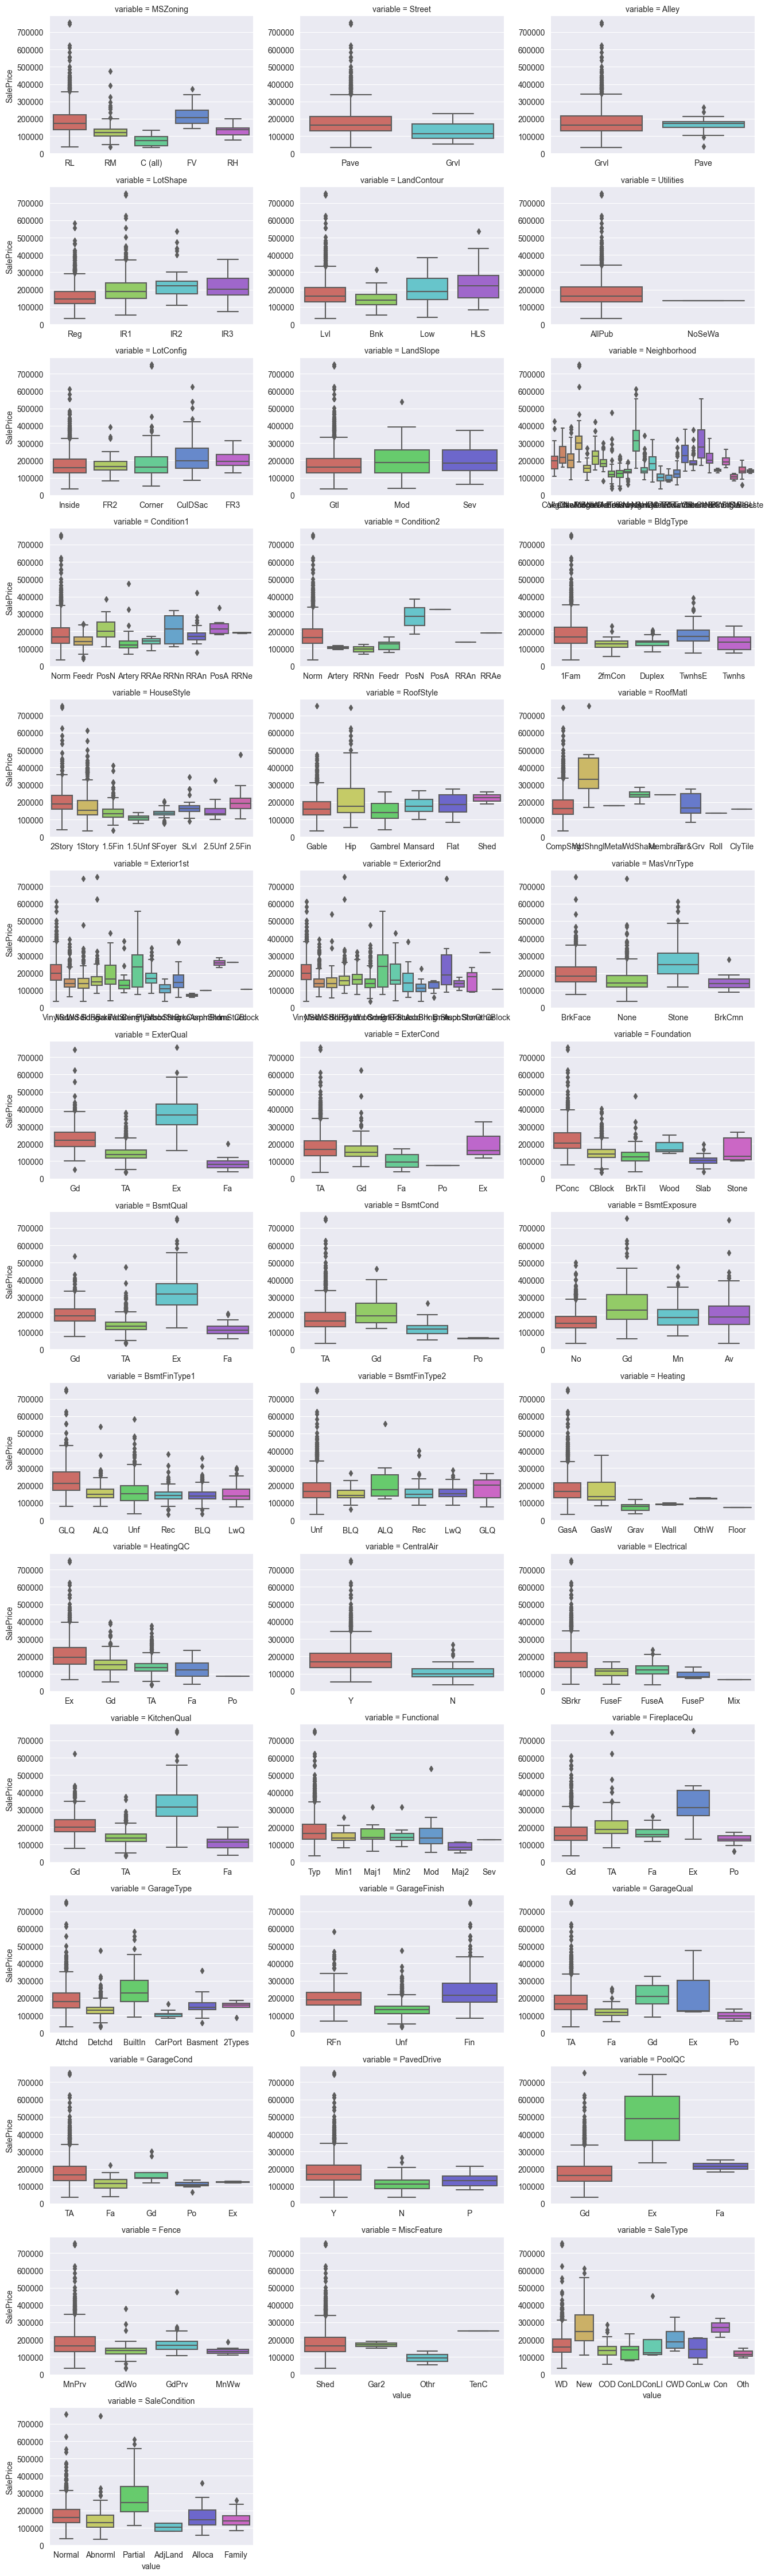

In [13]:
df_discrete_melted = pd.melt(df_train_no_missing, value_vars=discrete_columns, id_vars=['SalePrice'])

g = sns.FacetGrid(df_discrete_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)

g.map(sns.boxplot, "value", "SalePrice", palette="hls")

Visualize the correlation between SalePrice and other columns.

Text(0.5, 1.0, 'Negative Correlations')

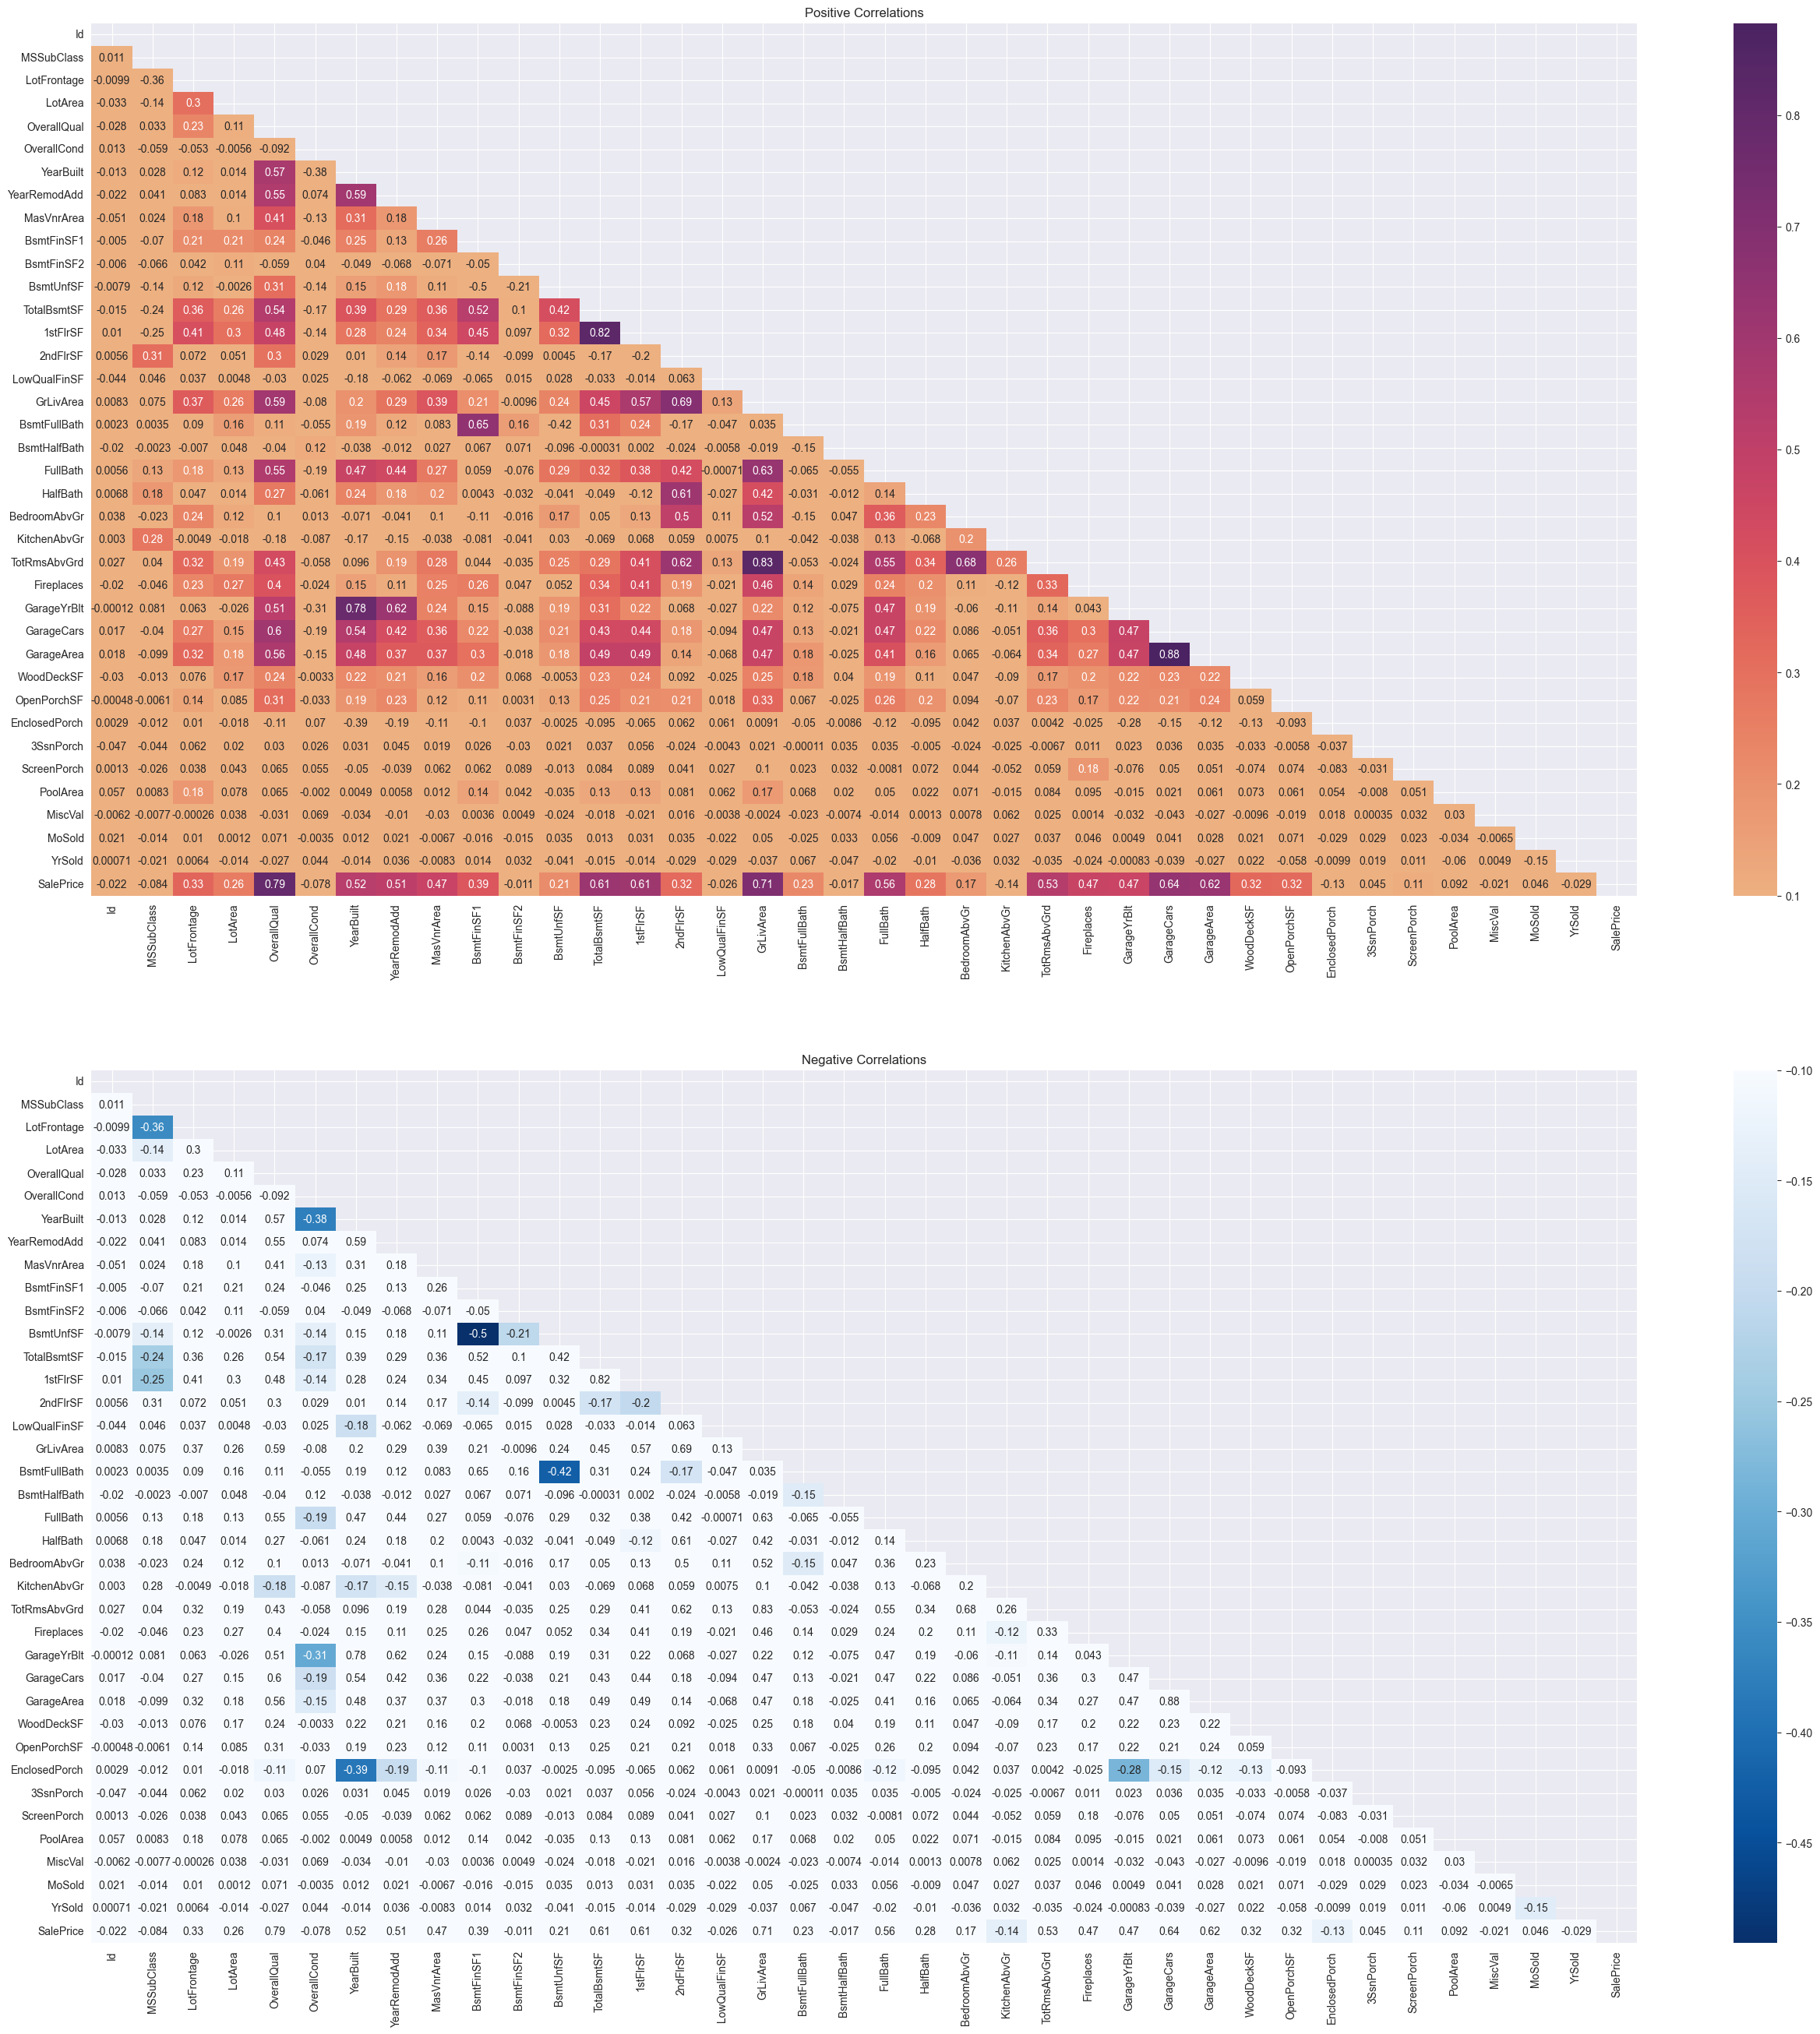

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(32, 32))
corr = df_train_no_missing.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(data=corr, annot=True, cmap='flare', ax=axes[0], mask=mask, vmin=0.1)
axes[0].set_title('Positive Correlations')
sns.heatmap(data=corr, annot=True, cmap='Blues_r', ax=axes[1], mask=mask, vmax=-0.1)
axes[1].set_title('Negative Correlations')

Scan through the heatmap, we will focus on values with absolute value greater than 0.4.

Text(0.5, 1.0, 'Negative Correlations')

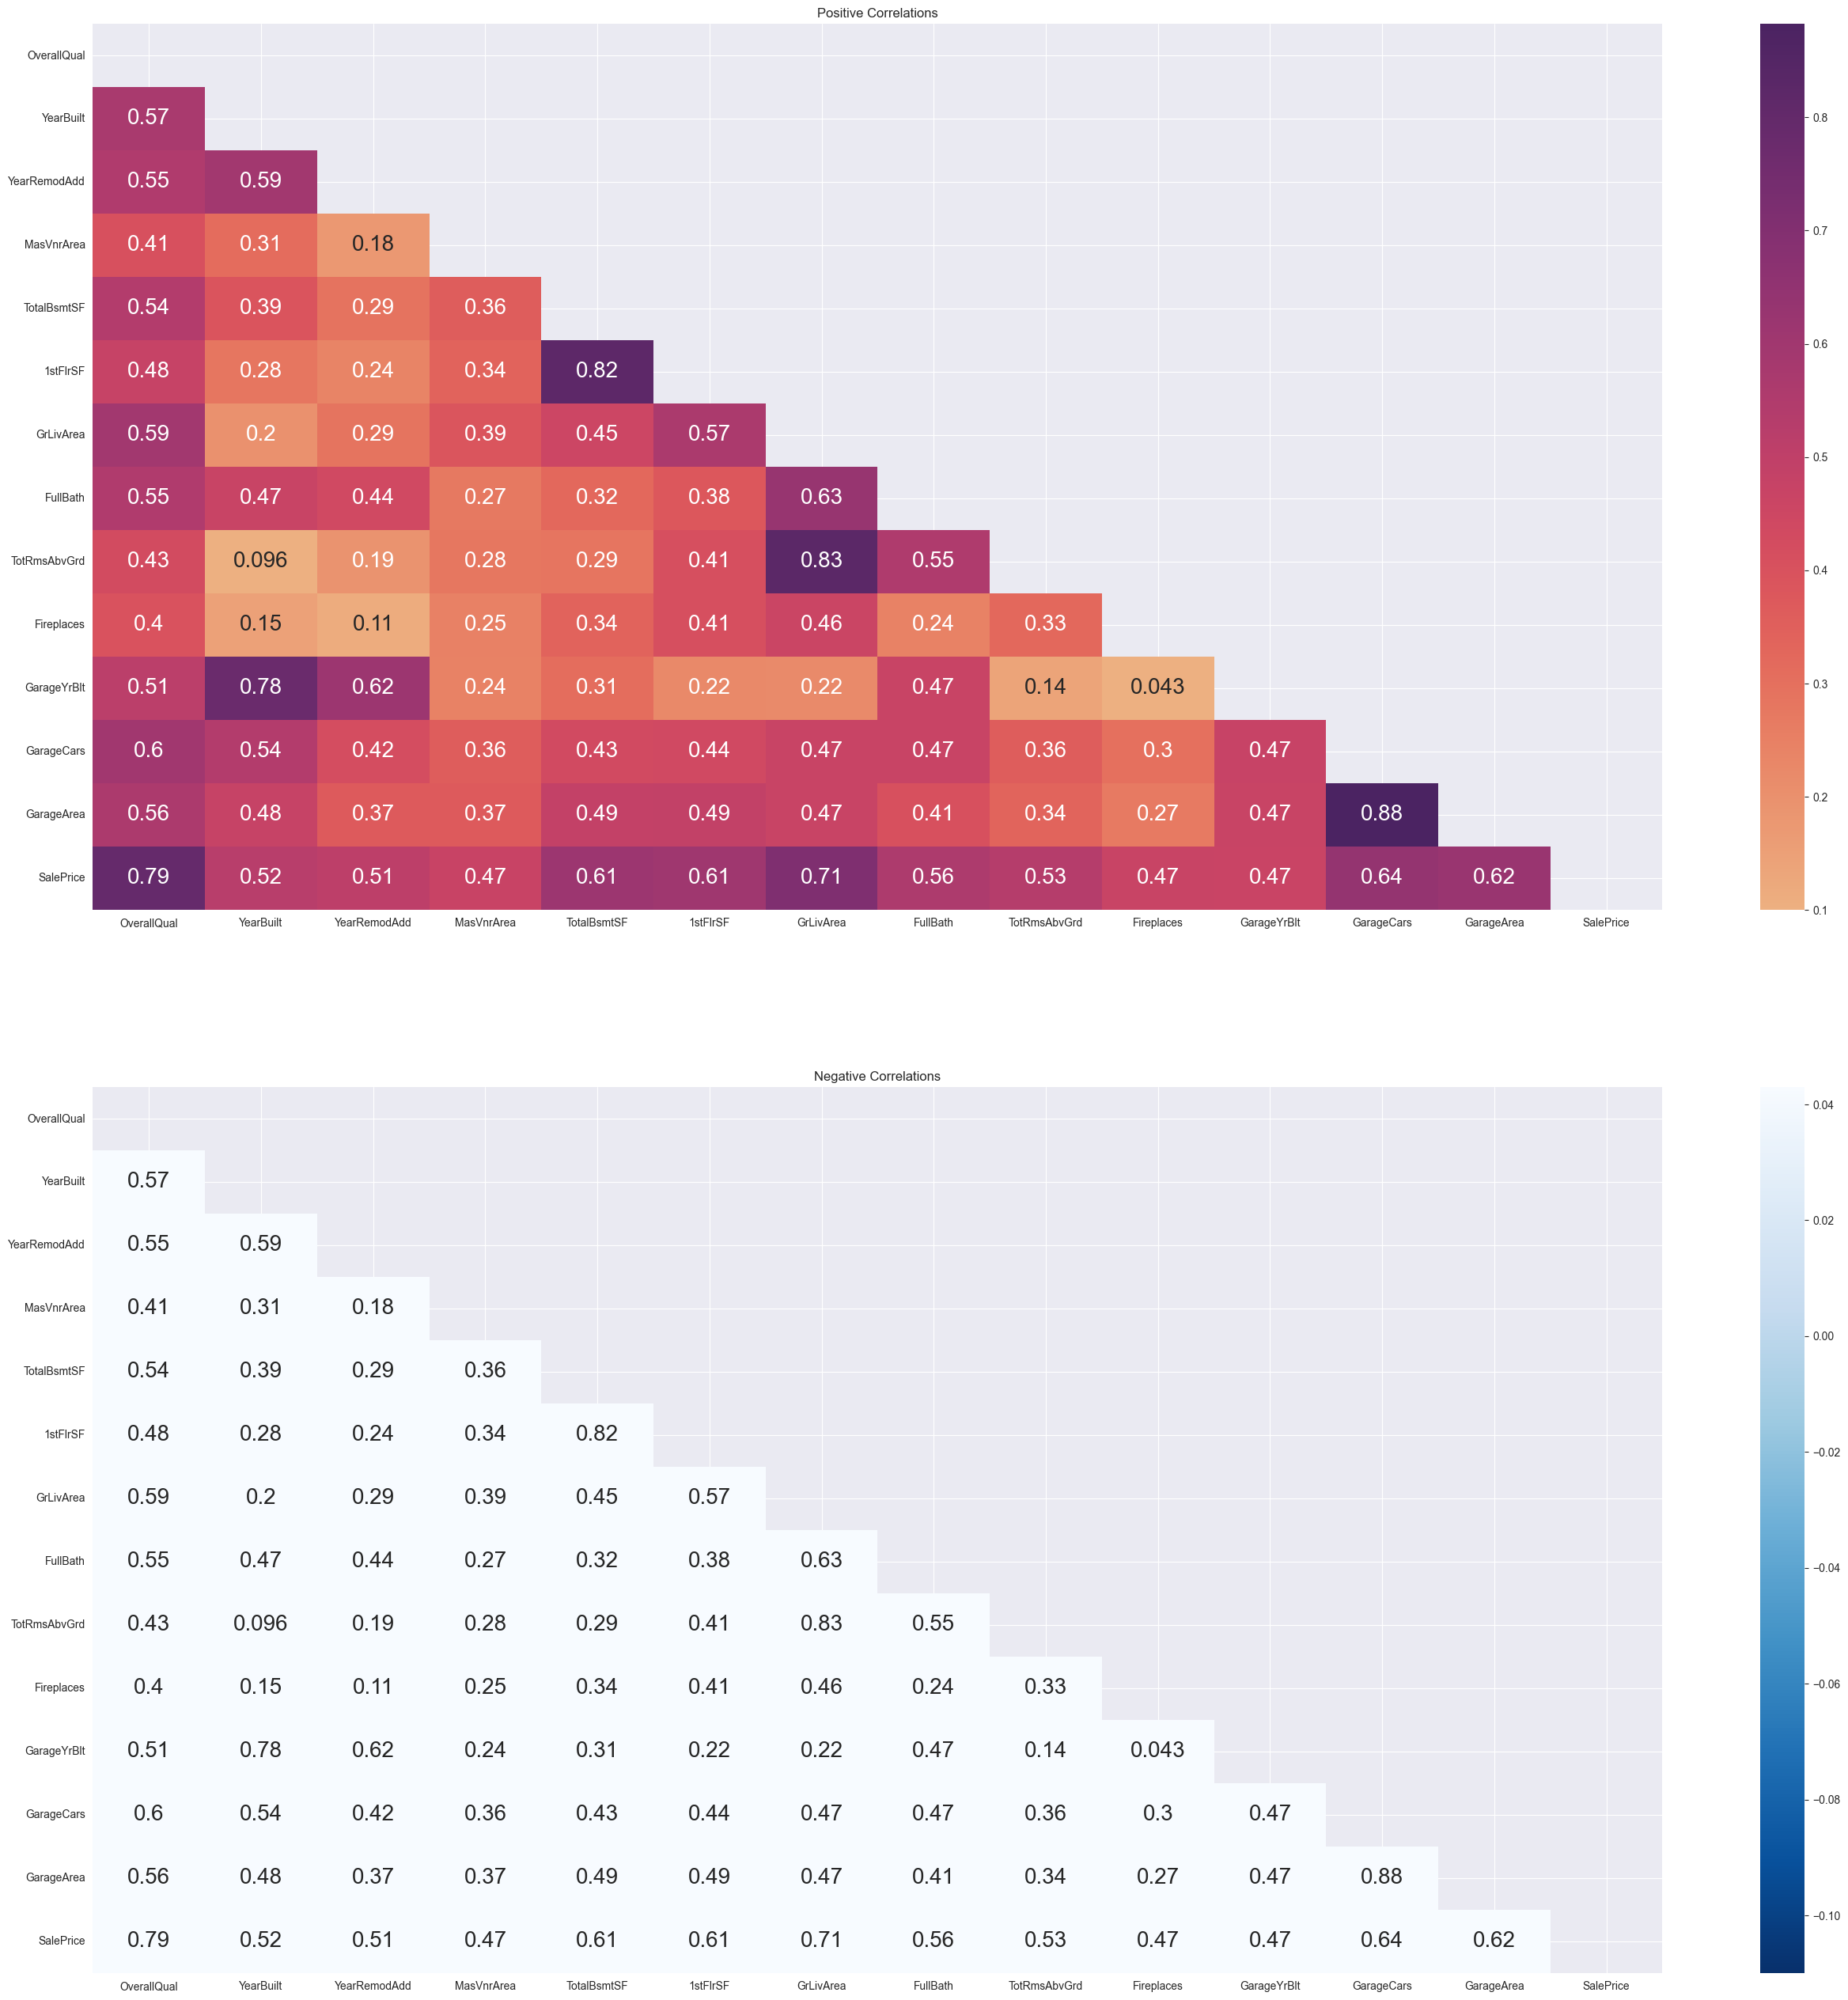

In [15]:
high_corr_columns = corr.index[abs(corr['SalePrice']) > 0.4]
df_filtered_corr = df_train_no_missing[high_corr_columns].corr()

_, axes = plt.subplots(2, 1, figsize=(32, 32))
mask = np.triu(np.ones_like(df_filtered_corr))
sns.heatmap(data=df_filtered_corr, annot=True, cmap='flare', ax=axes[0], mask=mask, vmin=0.1, annot_kws={'size': 20})
axes[0].set_title('Positive Correlations')
sns.heatmap(data=df_filtered_corr, annot=True, cmap='Blues_r', ax=axes[1], mask=mask, vmax=-0.1, annot_kws={'size': 20})
axes[1].set_title('Negative Correlations')

In [16]:
high_correlated_with_sale_price = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
print(f'High correlated columns: {high_correlated_with_sale_price}')

High correlated columns: ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


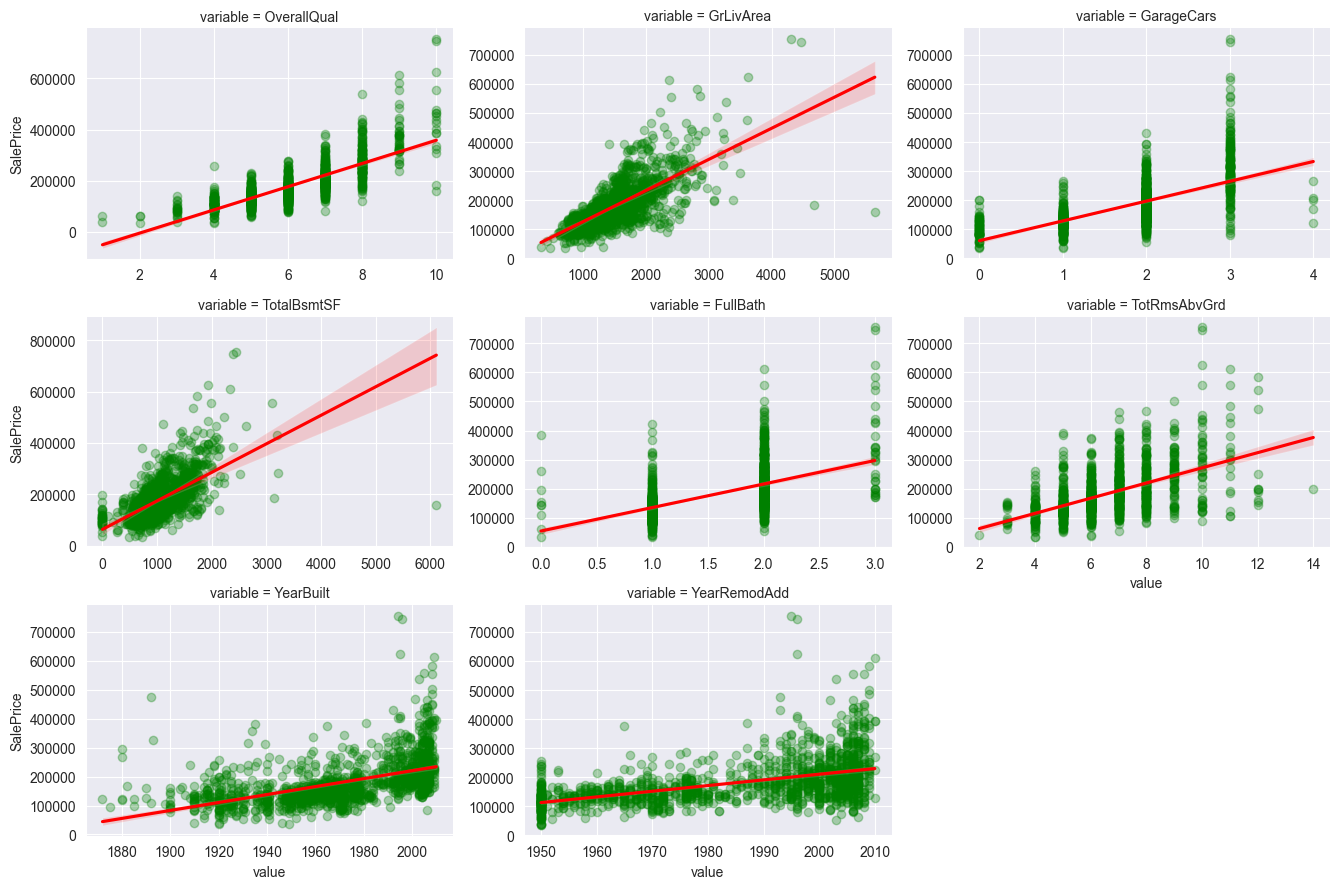

In [17]:
df_high_correlated_melted = pd.melt(df_train_no_missing, value_vars=high_correlated_with_sale_price, id_vars=['SalePrice'])
g = sns.FacetGrid(df_high_correlated_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)
g.map(sns.regplot, "value", "SalePrice", color='g', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

## Handle Outliner

Check the above graphs, there are not many outliners. We will just drop them manually.

We will look into GrLivArea and TotalBsmtSF. There're some data points that go off trend.

For GarageCars and TotRmsAbvGrd, they may not near the regression line but that just because they don't have enough data for that category.

For YearBuilt and YearRemodAdd, there're some special houses that were very expensive but the regression line looks stable so we will keep them.

In [18]:
print(f"GrLivArea to be dropped: {df_train_no_missing[(df_train_no_missing['GrLivArea']>4000) & (df_train_no_missing['SalePrice']<200000)].index}")
print(f"TotalBsmtSF to be dropped: {df_train_no_missing[(df_train_no_missing['TotalBsmtSF']>6000) & (df_train_no_missing['SalePrice']<200000)].index}")

GrLivArea to be dropped: Int64Index([523, 1298], dtype='int64')
TotalBsmtSF to be dropped: Int64Index([1298], dtype='int64')


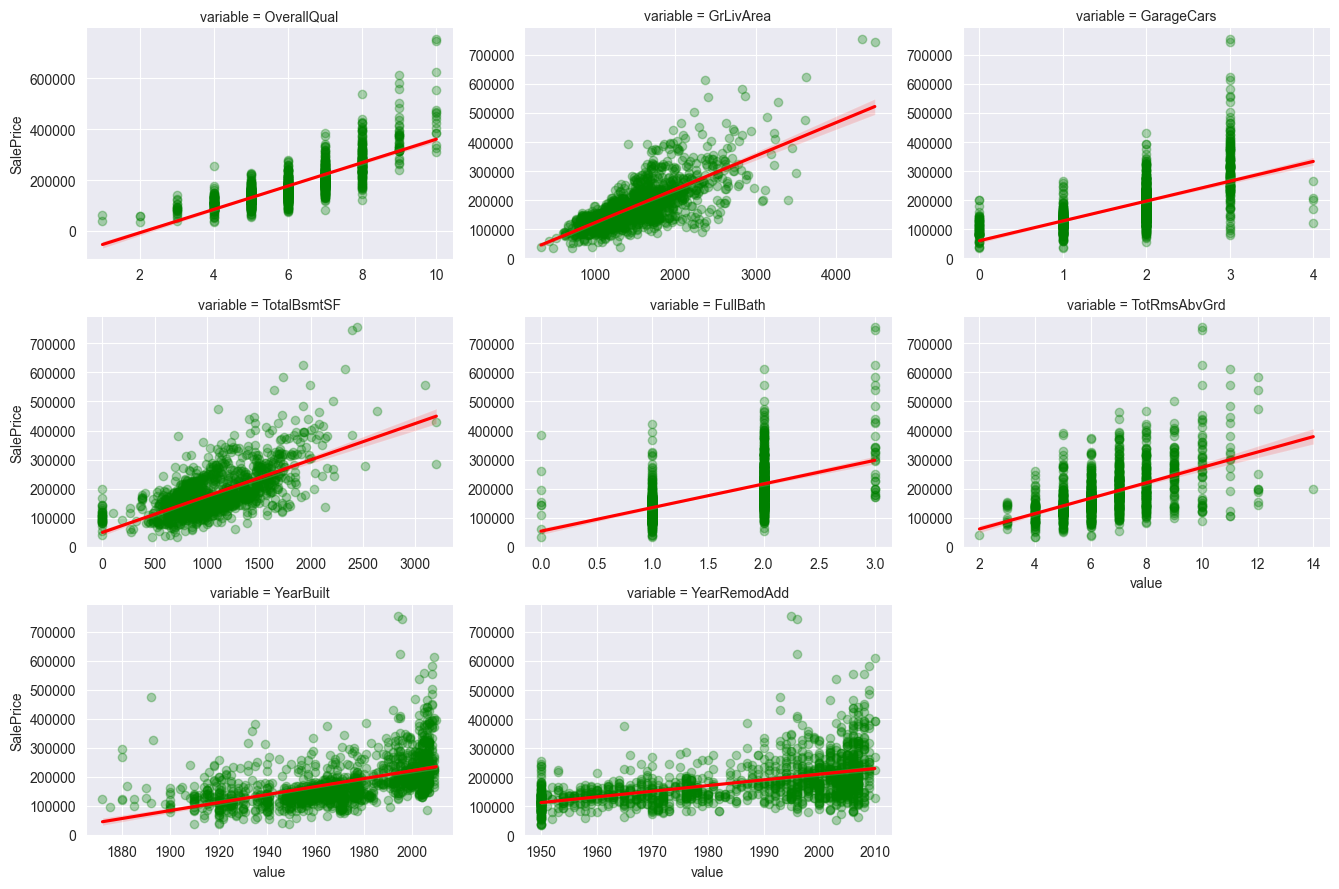

In [19]:
df_no_outliners = df_train_no_missing.drop([523, 1298])
df_no_outliners_melted = pd.melt(df_no_outliners, value_vars=high_correlated_with_sale_price, id_vars=['SalePrice'])
g = sns.FacetGrid(df_no_outliners_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)
g.map(sns.regplot, "value", "SalePrice", color='g', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

Convert year number to age would make more sense.

In [20]:
# The dataset was published in 2016. So we will use 2016 as the current year.
df_no_outliners['AgeBuilt'] = 2016 - df_no_outliners['YearBuilt']
df_no_outliners['AgeRemodAdd'] = 2016 - df_no_outliners['YearRemodAdd']

OK, we don't need the original year columns anymore.

In [21]:
df_no_outliners = df_no_outliners.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [22]:
high_correlated_with_sale_price.extend(['AgeBuilt', 'AgeRemodAdd'])
high_correlated_with_sale_price.remove('YearBuilt')
high_correlated_with_sale_price.remove('YearRemodAdd')

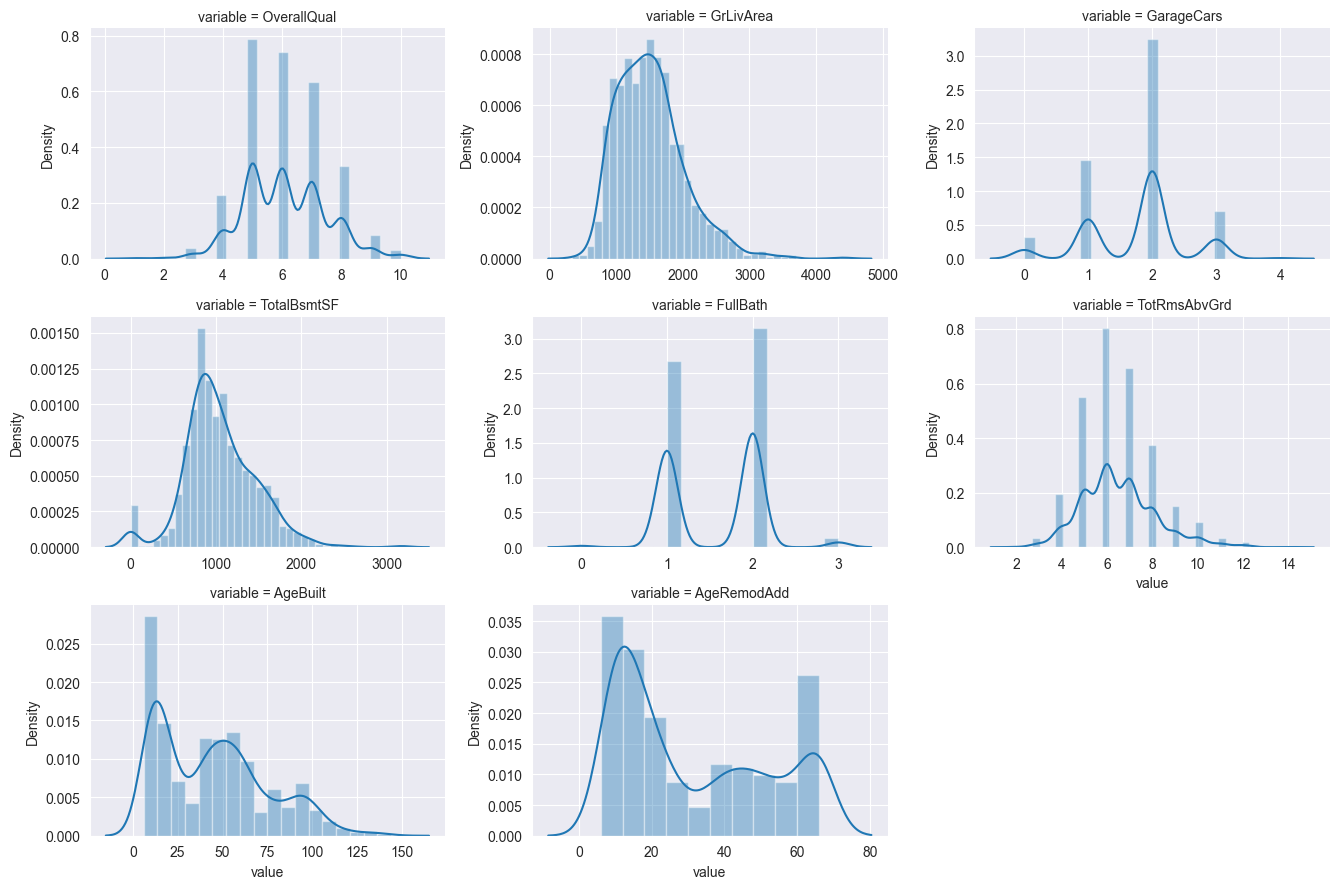

In [23]:
sns.FacetGrid(
    pd.melt(df_no_outliners[high_correlated_with_sale_price], value_vars=high_correlated_with_sale_price),
    col='variable',
    col_wrap=3,
    height=3,
    aspect=1.5,
    sharex=False,
    sharey=False
).map(
    sns.distplot,
    "value"
)

Look like there're a lot of 0 values in TotalBsmtSF. Let's check it out.

In [24]:
df_no_outliners[df_no_outliners['TotalBsmtSF'] == 0].count()

Id               37
MSSubClass       37
MSZoning         37
LotFrontage      37
LotArea          37
                 ..
SaleType         37
SaleCondition    37
SalePrice        37
AgeBuilt         37
AgeRemodAdd      37
Length: 81, dtype: int64

We will drop them so that we can normalize data later on easier.

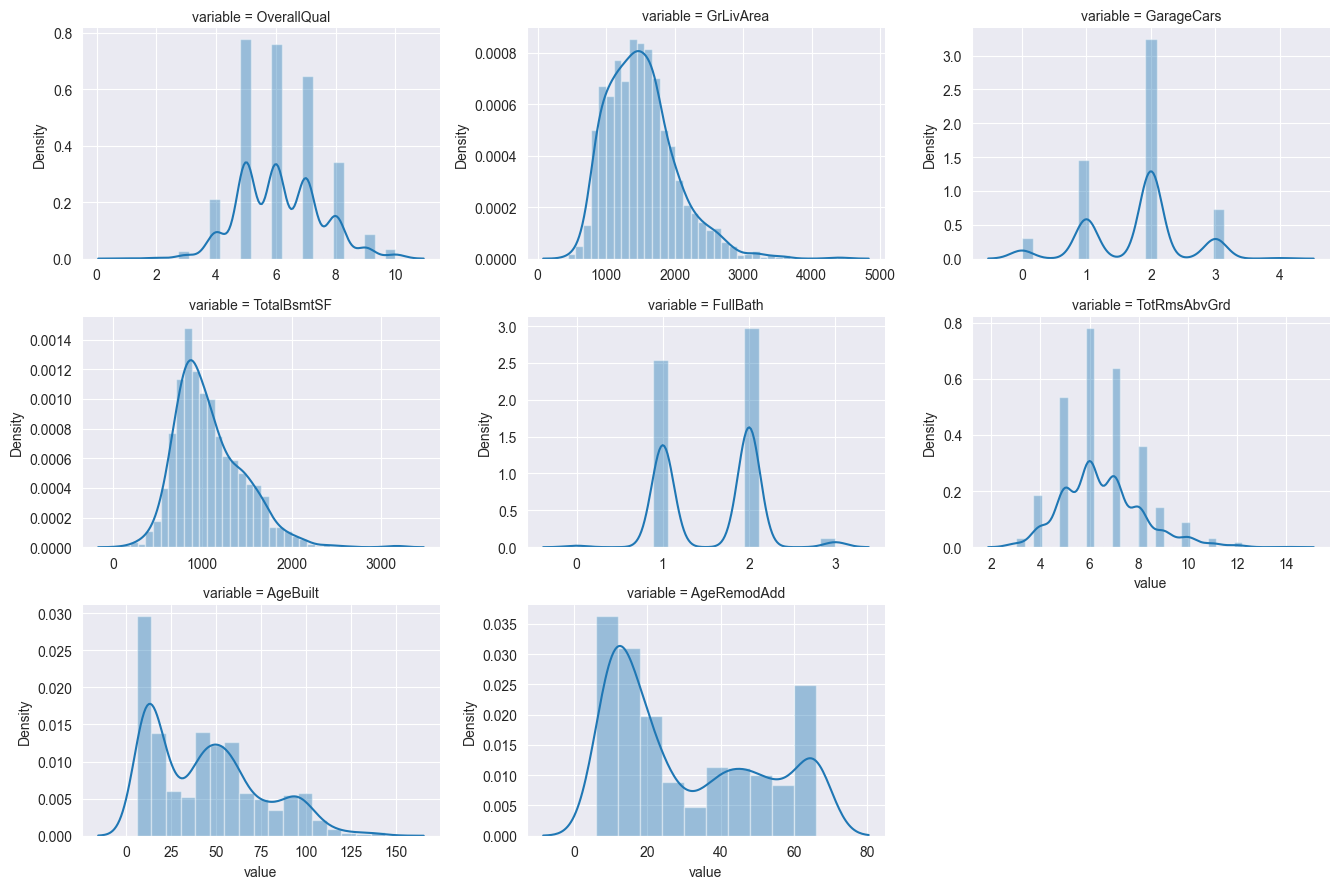

In [25]:
df_no_outliners = df_no_outliners[df_no_outliners['TotalBsmtSF'] != 0]

sns.FacetGrid(
    pd.melt(df_no_outliners[high_correlated_with_sale_price], value_vars=high_correlated_with_sale_price),
    col='variable',
    col_wrap=3,
    height=3,
    aspect=1.5,
    sharex=False,
    sharey=False
).map(
    sns.distplot,
    "value"
)

## Handle Categorical Data

We picked some continuous columns. Next is discrete columns.

To check correlation between discrete columns and SalePrice, we need to use ANOVA test. But before that, SalePrice should be transformed to normal distribution.

![guide](./img/correlation-test-guide.png)

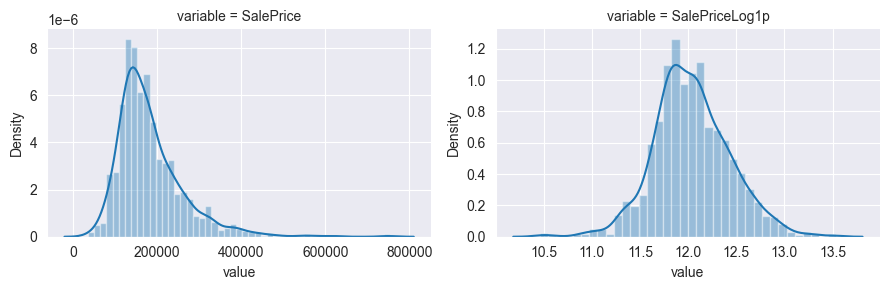

In [26]:
df_no_outliners['SalePriceLog1p'] = np.log1p(df_no_outliners['SalePrice'])

sns.FacetGrid(
    pd.melt(
        df_no_outliners[['SalePriceLog1p', 'SalePrice']],
        value_vars=['SalePrice', 'SalePriceLog1p']
    ),
    col='variable',
    col_wrap=2,
    height=3,
    aspect=1.5,
    sharex=False,
    sharey=False
).map(
    sns.distplot,
    "value"
)

Look good!

In [27]:
from scipy import stats

def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = discrete_columns
    p_vals = []
    f_vals = []
    for c in discrete_columns:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePriceLog1p'].values
            samples.append(s)
        f_val, p_val = stats.f_oneway(*samples)
        p_vals.append(p_val)
        f_vals.append(f_val)
    anv['p_value'] = p_vals
    anv['f_value'] = f_vals
    return anv.sort_values('p_value')

df_anova = anova(df_no_outliners)

df_anova[df_anova['p_value'] < 0.05].reset_index()
df_anova

features        p_value     f_value
8    Neighborhood  1.699849e-237   77.998282
18      ExterQual  8.661471e-188  398.874038
30    KitchenQual  1.225931e-180  378.843763
21       BsmtQual  4.805386e-177  368.952877
34   GarageFinish  8.493995e-130  369.183352
20     Foundation  1.665062e-104  145.868875
27      HeatingQC   8.829766e-77  102.601946
24   BsmtFinType1   9.930429e-66   70.223852
0        MSZoning   7.091374e-63   82.306475
33     GarageType   1.240298e-62   66.651038
17     MasVnrType   2.032392e-62  106.952210
15    Exterior1st   2.879927e-54   24.674088
16    Exterior2nd   1.253566e-48   19.696005
42  SaleCondition   4.741940e-41   42.677406
41       SaleType   4.390952e-36   24.869345
23   BsmtExposure   6.664993e-36   58.933659
28     CentralAir   4.478416e-35  161.266653
32    FireplaceQu   9.896556e-31   38.639942
12     HouseStyle   1.662673e-30   23.615015
37     PavedDrive   1.346921e-27   64.651927
3        LotShape   6.076495e-27   43.589018
29     Electrical   2.869338e-26   32.904358
22       BsmtCond   1.763384e-15   24.538620
13      RoofStyle   5.009267e-14   14.650154
19      ExterCond   1.432719e-11   14.451259
9      Condition1   6.533067e-11    8.210069
35     GarageQual   1.295543e-10   13.265945
36     GarageCond   2.818886e-10   12.847488
11       BldgType   3.537648e-09   11.485418
4     LandContour   4.817053e-09   14.076040
26        Heating   5.751762e-08   12.334642
6       LotConfig   5.391635e-07    8.772050
39          Fence   3.906457e-06    9.371584
31     Functional   2.299995e-05    5.253898
14       RoofMatl   1.745620e-04    4.463207
38         PoolQC   3.444721e-03    5.693652
10     Condition2   5.004027e-03    2.912225
1          Street   2.132742e-02    5.311620
25   BsmtFinType2   7.363276e-02    2.016447
7       LandSlope   2.832854e-01    1.262423
2           Alley   5.090407e-01    0.436259
5       Utilities   6.020890e-01    0.271979
40    MiscFeature   7.156615e-01    0.452366

The lower the p_value, the more significant the feature is. We inverse the p_value to make it easier to visualize.

<Axes: xlabel='inverse_p_value', ylabel='features'>

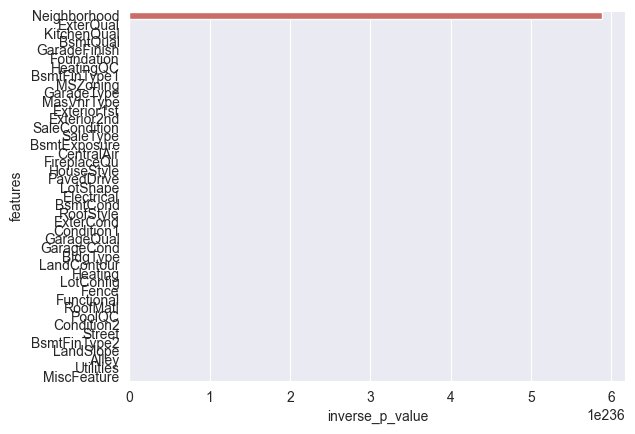

In [28]:
df_anova['inverse_p_value'] = 1 / df_anova['p_value']
sns.barplot(data=df_anova, y='features', x='inverse_p_value', orient='h', palette='hls')

Neighborhood is the most significant feature which make other features trivial. We will pick it.

<Axes: xlabel='SalePriceLog1p', ylabel='Neighborhood'>

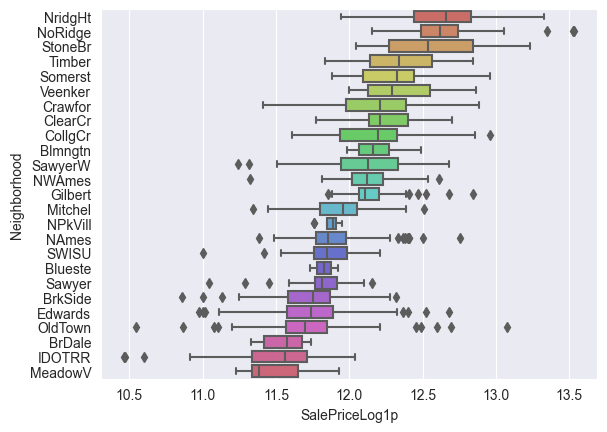

In [29]:
sns.boxplot(
    data=df_no_outliners,
    y='Neighborhood',
    x='SalePriceLog1p',
    palette='hls',
    orient='h',
    order=df_no_outliners.groupby('Neighborhood')['SalePrice']
        .median()
        .sort_values(ascending=False)
        .index
)

Visualize this way, we can see different neighborhoods have different SalePrice.

Next step is to encode the Neighborhood column so that we can use it in the model. At the first look, we can use one-hot encoding. But we will try label encoding first to see if our data have ordinal relationship.

In [30]:
from sklearn.preprocessing import OrdinalEncoder

<Axes: xlabel='NeighborhoodOrdinal', ylabel='Density'>

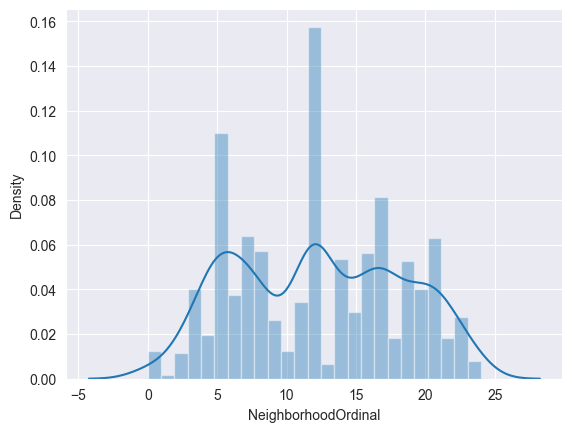

In [31]:
ordinal_encoder = OrdinalEncoder()

df_ordinal = pd.DataFrame(
    ordinal_encoder.fit_transform(df_no_outliners[['Neighborhood']]),
    columns=['NeighborhoodOrdinal']
)

sns.distplot(
    df_ordinal['NeighborhoodOrdinal'],
    kde=True,
    rug=False,
    bins=len(df_no_outliners['Neighborhood'].unique())
)

We expected it should look somewhat like a normal distribution.

In [32]:
df_no_outliners = pd.get_dummies(df_no_outliners, columns=['Neighborhood'])
df_no_outliners.filter(regex='Neighborhood')

Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
1455                     0                     0                    0   
1456                     0                     0                    0   
1457                     0                     0                    0   
1458                     0                     0                    0   
1459                     0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                        0                     0                     1   
1                        0                     0                     0   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0                     0                     0   
1456                     0                     0                     0   
1457                     0                     0                     0   
1458                     0                     0                     0   
1459                     0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        1                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0                     0                     1   
1456                     0                     0                     0   
1457                     1                     0                     0   
1458                     0                     0                     0   
1459                     0                     1                     0   

      Neighborhood_IDOTRR  ...  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                       0  ...                     0                     0   
1                       0  ...                     0                     0   
2                       0  ...                     0                     0   
3                       0  ...                     0                     0   
4                       0  ...                     1                     0   
...                   ...  ...                   ...                   ...   
1455                    0  ...                     0                     0   
1456                    0  ...                     0                     0   
1457                    0  ...                     0                     0   
1458                    0  ...                     0                     0   
1459                    0  ...                     0                     0   

      Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                        0                   0                    0   
1                        0                   0                    0   
2                        0                   0                    0   
3                        0                   0                    0   
4                        0                   0             

## Normalize Data

<Axes: xlabel='skewness'>

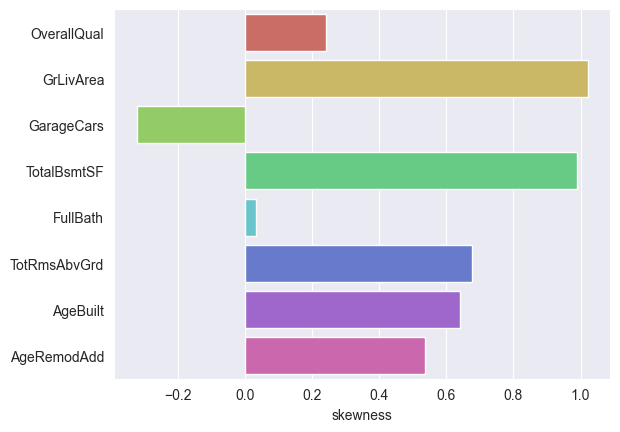

In [33]:
tobe_normalized_cols = high_correlated_with_sale_price.copy()

df_tobe_normalized = df_no_outliners[tobe_normalized_cols]
df_skewness = pd.DataFrame(
    {
        "skewness": df_tobe_normalized.skew(),
    }
)

sns.barplot(
    data=df_skewness,
    y=df_skewness.index,
    x='skewness',
    orient='h',
    palette='hls'
)

We will perform normalize on columns which have skewness > 0.4

In [34]:
for col in tobe_normalized_cols:
    # Optimal lambda can be found by stats.boxcox_normmax, but it may vary from column to column.
    # We need a constant value so that we can apply to the test set later on.
    # 0.2 is a good value our case after some trial and error.
    df_tobe_normalized[f'Normalized{col}'] = stats.boxcox(df_tobe_normalized[col], lmbda=0.2)

And check skewness again

In [35]:
df_tobe_normalized.filter(regex='Normalized').skew()

NormalizedOverallQual    -0.460077
NormalizedGrLivArea       0.160199
NormalizedGarageCars     -3.444942
NormalizedTotalBsmtSF    -0.044380
NormalizedFullBath       -5.095644
NormalizedTotRmsAbvGrd    0.025463
NormalizedAgeBuilt       -0.135932
NormalizedAgeRemodAdd     0.122704
dtype: float64

Visualize data after normalization

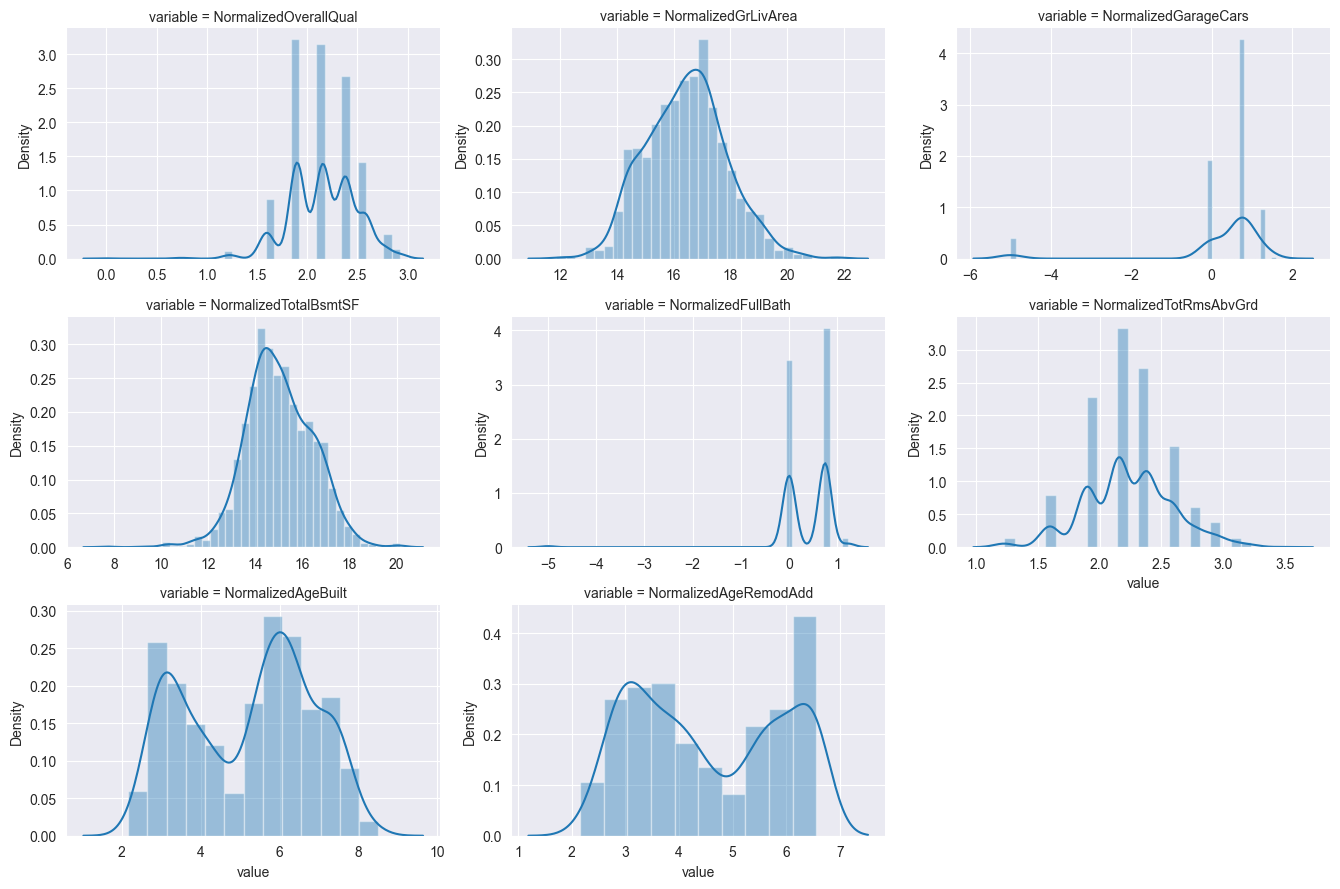

In [36]:
sns.FacetGrid(
    pd.melt(
        df_tobe_normalized,
        value_vars=[f'Normalized{col}' for col in tobe_normalized_cols]
    ),
    col='variable',
    col_wrap=3,
    height=3,
    aspect=1.5,
    sharex=False,
    sharey=False
).map(
    sns.distplot,
    "value"
)

Except Age columns, the rest look somewhat better.

## Hypothesis

- After selecting important features, we have done scaling and normalizing so that the model could perform better
- Categorical data is also encoded
- Because we need numeric output, we should use regression models (with boosters) in this problem
- Suggesting to try with LGBMRegressor, XGBRegressor, GradientBoostingRegressor,...
- Some online lads suggest stacking all models together, use the average or a set of weights for each model might return better result
- This competition used RMSE as evaluation metric, so we should use RMSE as well
- Finally, this is the house price so SalePrice should be rounded to some extent as after processing

## Building Model

Dozens of steps for preprocessing data above. Let's collect the interested columns and build the model.

In [37]:
# Take normalize columns and which no need to normalize
selected_columns = []
normalize_columns = df_tobe_normalized.filter(regex='Normalized').columns.tolist()
all_normalize_name = "".join(normalize_columns)
for col in high_correlated_with_sale_price:
    if col in all_normalize_name:
        continue
    else:
        normalize_columns.append(col)

selected_columns.extend(normalize_columns)
# Take dummy Neighborhood columns
selected_columns.extend(df_no_outliners.filter(regex='Neighborhood_').columns.tolist())

pd.DataFrame(
    {
        'columns': selected_columns,
    }
).head(5)

columns
0  NormalizedOverallQual
1    NormalizedGrLivArea
2   NormalizedGarageCars
3  NormalizedTotalBsmtSF
4     NormalizedFullBath

Get according DataFrame

In [38]:
df_preprocessed = pd.concat(
    [
        df_no_outliners,
        df_tobe_normalized
    ],
    axis=1
).T.drop_duplicates().T

df_selected = df_preprocessed[selected_columns]

Make sure data type is numeric

In [39]:
for col in df_selected.columns:
    df_selected[col] = pd.to_numeric(df_selected[col])

df_preprocessed['SalePriceLog1p'] = pd.to_numeric(df_preprocessed['SalePriceLog1p'])
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NormalizedOverallQual   1421 non-null   float64
 1   NormalizedGrLivArea     1421 non-null   float64
 2   NormalizedGarageCars    1421 non-null   float64
 3   NormalizedTotalBsmtSF   1421 non-null   float64
 4   NormalizedFullBath      1421 non-null   float64
 5   NormalizedTotRmsAbvGrd  1421 non-null   float64
 6   NormalizedAgeBuilt      1421 non-null   float64
 7   NormalizedAgeRemodAdd   1421 non-null   float64
 8   Neighborhood_Blmngtn    1421 non-null   int64  
 9   Neighborhood_Blueste    1421 non-null   int64  
 10  Neighborhood_BrDale     1421 non-null   int64  
 11  Neighborhood_BrkSide    1421 non-null   int64  
 12  Neighborhood_ClearCr    1421 non-null   int64  
 13  Neighborhood_CollgCr    1421 non-null   int64  
 14  Neighborhood_Crawfor    1421 non-null   

Let's start trying some models

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, HuberRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [41]:
lasso = Lasso(random_state=0)
lasso_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 1],
}

lasso_cv = GridSearchCV(
    lasso,
    param_grid=lasso_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

lasso_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {lasso_cv.best_score_}')
print(f'Best params: {lasso_cv.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score: -0.1466251628057404
Best params: {'alpha': 0.0001}


In [42]:
ridge = Ridge(random_state=0)
ridge_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 1],
}

ridge_cv = GridSearchCV(
    ridge,
    param_grid=ridge_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

ridge_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {ridge_cv.best_score_}')
print(f'Best params: {ridge_cv.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score: -0.14668795254507155
Best params: {'alpha': 1}


In [43]:
huber = HuberRegressor()
huber_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 1],
    'epsilon': [1.35, 1.5, 1.75],
    'max_iter': [300, 500, 1000],
}

huber_cv = GridSearchCV(
    huber,
    param_grid=huber_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

huber_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {huber_cv.best_score_}')
print(f'Best params: {huber_cv.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: -0.14709077548030686
Best params: {'alpha': 1, 'epsilon': 1.75, 'max_iter': 1000}


In [44]:
ada = AdaBoostRegressor(random_state=0)
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1],
}

ada_cv = GridSearchCV(
    ada,
    param_grid=ada_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

ada_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {ada_cv.best_score_}')
print(f'Best params: {ada_cv.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score: -0.18115404146019404
Best params: {'learning_rate': 0.1, 'n_estimators': 100}


In [45]:
random_forest = RandomForestRegressor(random_state=0)
random_forest_param_grid = {
    'n_estimators': [100, 120, 150],
    'max_depth': [10, 13, 15],
}

random_forest_cv = GridSearchCV(
    random_forest,
    param_grid=random_forest_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

random_forest_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {random_forest_cv.best_score_}')
print(f'Best params: {random_forest_cv.best_params_}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: -0.15212979921271713
Best params: {'max_depth': 13, 'n_estimators': 100}


In [46]:
extra_tree = ExtraTreesRegressor(random_state=0)

extra_tree_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 13, 15],
}

extra_tree_cv = GridSearchCV(
    extra_tree,
    param_grid=extra_tree_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

extra_tree_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {extra_tree_cv.best_score_}')
print(f'Best params: {extra_tree_cv.best_params_}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: -0.15095793264004942
Best params: {'max_depth': 13, 'n_estimators': 200}


In [47]:
gradient_boosting = GradientBoostingRegressor(random_state=0)

gradient_boosting_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1, 1],
}

gradient_boosting_cv = GridSearchCV(
    gradient_boosting,
    param_grid=gradient_boosting_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

gradient_boosting_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {gradient_boosting_cv.best_score_}')
print(f'Best params: {gradient_boosting_cv.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: -0.15040057625476194
Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [48]:
svr = SVR()

svr_param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.001, 0.1, 1],
}

svr_cv = GridSearchCV(
    svr,
    param_grid=svr_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

svr_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {svr_cv.best_score_}')
print(f'Best params: {svr_cv.best_params_}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best score: -0.14177645387851617
Best params: {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}


In [49]:
decision_tree = DecisionTreeRegressor(random_state=0)

decision_tree_param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [5, 10, 15],
}

decision_tree_cv = GridSearchCV(
    decision_tree,
    param_grid=decision_tree_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

decision_tree_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {decision_tree_cv.best_score_}')
print(f'Best params: {decision_tree_cv.best_params_}')


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: -0.1951488285692517
Best params: {'criterion': 'friedman_mse', 'max_depth': 5}


In [50]:
k_neighbors = KNeighborsRegressor()

k_neighbors_param_grid = {
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

k_neighbors_cv = GridSearchCV(
    k_neighbors,
    param_grid=k_neighbors_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

k_neighbors_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {k_neighbors_cv.best_score_}')
print(f'Best params: {k_neighbors_cv.best_params_}')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best score: -0.16026545606394352
Best params: {'algorithm': 'kd_tree', 'n_neighbors': 11, 'weights': 'distance'}


In [51]:
kernel_ridge = KernelRidge()

kernel_ridge_param_grid = {
    'alpha': [0.0001, 0.001, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.0001, 0.001, 0.1, 1],
}

kernel_ridge_cv = GridSearchCV(
    kernel_ridge,
    param_grid=kernel_ridge_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

kernel_ridge_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {kernel_ridge_cv.best_score_}')
print(f'Best params: {kernel_ridge_cv.best_params_}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best score: -0.14170189976994846
Best params: {'alpha': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}


In [52]:
xgboost = XGBRegressor(random_state=0)

xgboost_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1, 1],
}

xgboost_cv = GridSearchCV(
    xgboost,
    param_grid=xgboost_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

xgboost_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {xgboost_cv.best_score_}')
print(f'Best params: {xgboost_cv.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: -0.14449262317886138
Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [53]:
lightgbm = LGBMRegressor(random_state=0)

lightgbm_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1, 1],
}

lightgbm_cv = GridSearchCV(
    lightgbm,
    param_grid=lightgbm_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

lightgbm_cv.fit(df_selected, df_preprocessed['SalePriceLog1p'])

print(f'Best score: {lightgbm_cv.best_score_}')
print(f'Best params: {lightgbm_cv.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: -0.14985155016793034
Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


Plotting the results

<Axes: xlabel='Score', ylabel='Model'>

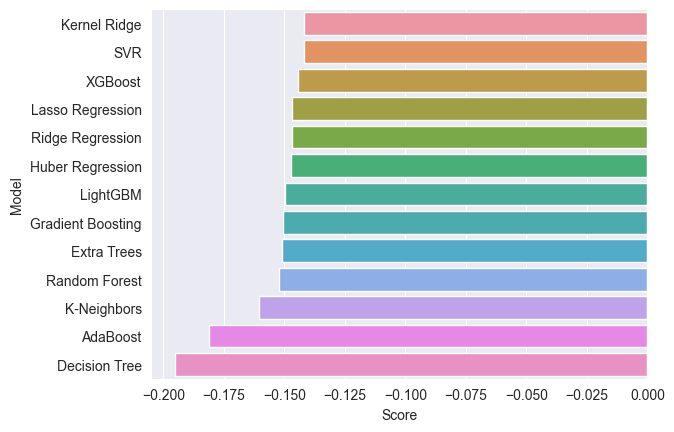

In [54]:
df_score = pd.DataFrame({
    'Model': [
        'Ridge Regression',
        'Lasso Regression',
        'Huber Regression',
        'AdaBoost',
        'Random Forest',
        'Extra Trees',
        'Gradient Boosting',
        'SVR',
        'Decision Tree',
        'K-Neighbors',
        'Kernel Ridge',
        'XGBoost',
        'LightGBM',
    ],
    'Score': [
        ridge_cv.best_score_,
        lasso_cv.best_score_,
        huber_cv.best_score_,
        ada_cv.best_score_,
        random_forest_cv.best_score_,
        extra_tree_cv.best_score_,
        gradient_boosting_cv.best_score_,
        svr_cv.best_score_,
        decision_tree_cv.best_score_,
        k_neighbors_cv.best_score_,
        kernel_ridge_cv.best_score_,
        xgboost_cv.best_score_,
        lightgbm_cv.best_score_,
    ]
})

sns.barplot(x='Score', y='Model', data=df_score.sort_values(by='Score', ascending=False))

The magnitude is small. Some models are just slightly better than others.

We will try select some of the best models and ensemble them.

In [55]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [56]:
voting_regressor = VotingRegressor(
    estimators=[
        ('kernel_ridge', kernel_ridge_cv.best_estimator_),
        ('lasso', lasso_cv.best_estimator_),
        ('lightgbm', lightgbm_cv.best_estimator_),
    ],
    n_jobs=-1,
    verbose=1
)

voting_regressor.fit(df_selected, df_preprocessed['SalePriceLog1p'])

voting_regressor_score = cross_val_score(
    voting_regressor,
    df_selected,
    df_preprocessed['SalePriceLog1p'],
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print(f'Voting Regressor score: {voting_regressor_score.mean()}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Voting Regressor score: -0.13973726369731454


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [57]:
stacking_regressor = StackingRegressor(
    estimators=[
        ('kernel_ridge', kernel_ridge_cv.best_estimator_),
        ('lasso', lasso_cv.best_estimator_),
        ('lightgbm', lightgbm_cv.best_estimator_),
    ],
    final_estimator=RandomForestRegressor(random_state=0),
    n_jobs=-1,
    verbose=1
)

stacking_regressor.fit(df_selected, df_preprocessed['SalePriceLog1p'])

stacking_regressor_score = cross_val_score(
    stacking_regressor,
    df_selected,
    df_preprocessed['SalePriceLog1p'],
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print(f'Stacking Regressor score: {stacking_regressor_score.mean()}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Stacking Regressor score: -0.14443333998221033


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Let's plot the result again.

<Axes: xlabel='Score', ylabel='Model'>

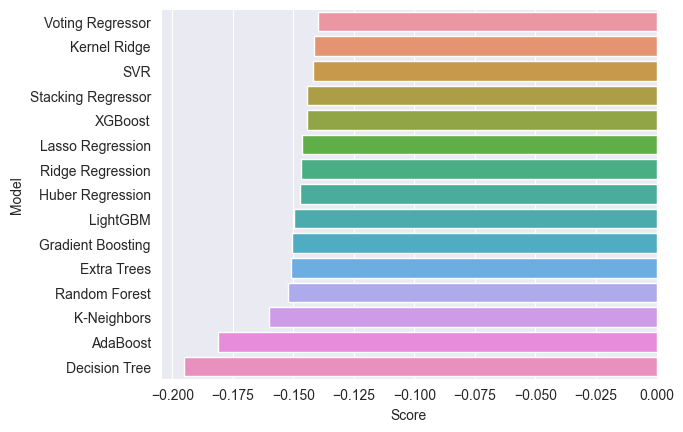

In [58]:
df_score2 = df_score.append([
    {
        'Model': 'Voting Regressor',
        'Score': voting_regressor_score.mean(),
    },
    {
        'Model': 'Stacking Regressor',
        'Score': stacking_regressor_score.mean(),
    },
])

sns.barplot(x='Score', y='Model', data=df_score2.sort_values(by='Score', ascending=False))

We got improve a little bit with Voting Regressor. Next, we will do prediction on the test set.